# Beta Distribution

## Setup

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
sns.set_theme()

In [3]:
df = pd.read_csv("../../data/beta.csv", comment='#', converters={"rates": lambda x: np.fromstring(x[1:-1], dtype=int, sep=' ')})

## Prepare `DataFrame`

add statistics to `df`

In [4]:
df['n'] = df['rates'].apply(len)

In [5]:
df['h'] = df['rates'].apply(np.sum)

In [6]:
df['cycle-end'] = df['cycle-start'] + df['cycle-length']

In [7]:
df['norm_backlog'] = df['backlog'] / df['h']

In [8]:
df['norm_rates'] = df['rates'] / df['h']

In [9]:
df['std'] = df['norm_rates'].apply(np.std)

In [10]:
df['min'] = df['norm_rates'].apply(np.min)

In [11]:
df['max'] = df['norm_rates'].apply(np.max)

In [12]:
df['nunique'] = df['norm_rates'].apply(lambda x: len(np.unique(x)))

In [13]:
df['norm_rates_str'] = df['norm_rates'].astype("string")

In [14]:
df['diff-backlog'] = df.groupby(by='norm_rates_str', group_keys=False)['norm_backlog'].apply(lambda x: x - x.min())

In [15]:
df['diff-cycle-start'] = df.groupby(by='norm_rates_str', group_keys=False)['cycle-start'].apply(lambda x: x - x.min())

In [16]:
df['diff-cycle-length'] = df.groupby(by='norm_rates_str', group_keys=False)['cycle-length'].apply(lambda x: x - x.min())

In [17]:
df['best-backlog'] = df['diff-backlog'] == 0

## Statistics

number of analyzed instances

In [18]:
len(df[df['strategy'] == 'RM'])

90000

## Distribution of Backlog

histogram of backlog for both strategies, bins start at 1, width 0.05

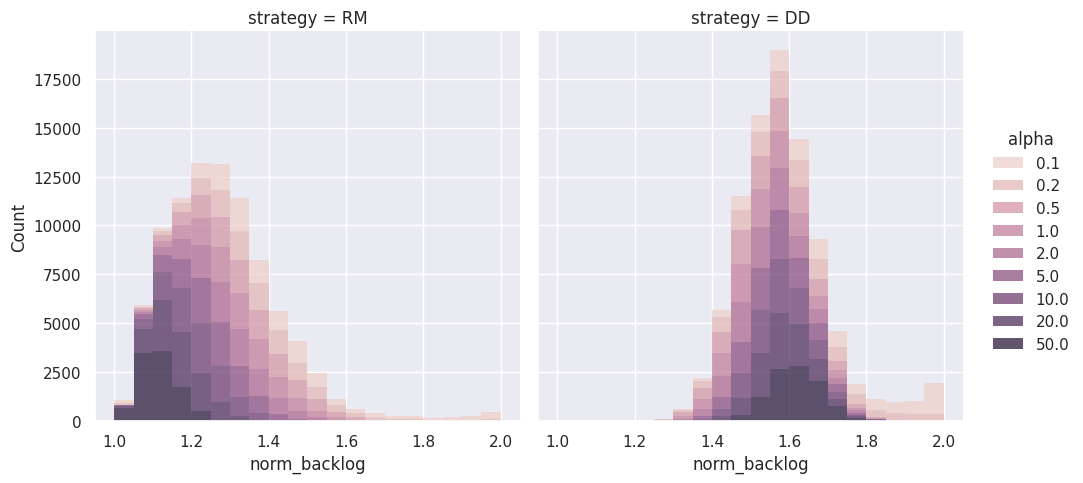

In [19]:
bins = np.arange(21) / 20 + 1
sns.displot(data=df, x='norm_backlog', hue='alpha', hue_norm=mpl.colors.LogNorm(), col='strategy', multiple='stack', linewidth=0, bins=bins)

eCDF of backlog for both strategies, categorized by the beta distribution parameters

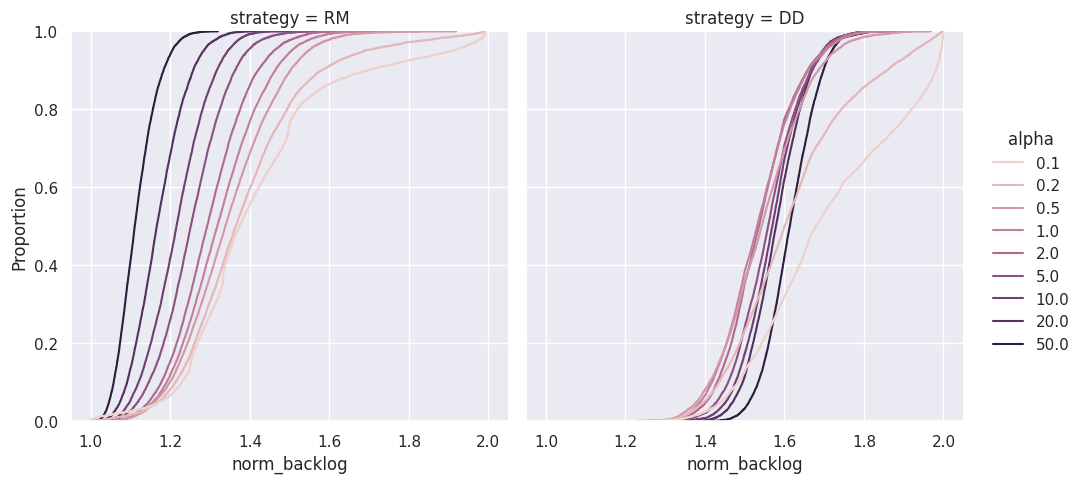

In [20]:
sns.displot(data=df, x='norm_backlog', hue='alpha', hue_norm=mpl.colors.LogNorm(), col='strategy', kind='ecdf')

mean backlog for both strategies

In [21]:
df.groupby('strategy')['norm_backlog'].mean()

strategy
DD    1.586589
RM    1.281048
Name: norm_backlog, dtype: float64

percentage of instances where `RM` is not the best strategy

In [22]:
len(df[(df['strategy'] == 'RM') & (df['diff-backlog'] != 0)]) / len(df[df['strategy'] == 'RM'])

0.027966666666666667

eCDF of the difference between a strategy's backlog compared to the smallest backlog for this instance (`diff-backlog`)

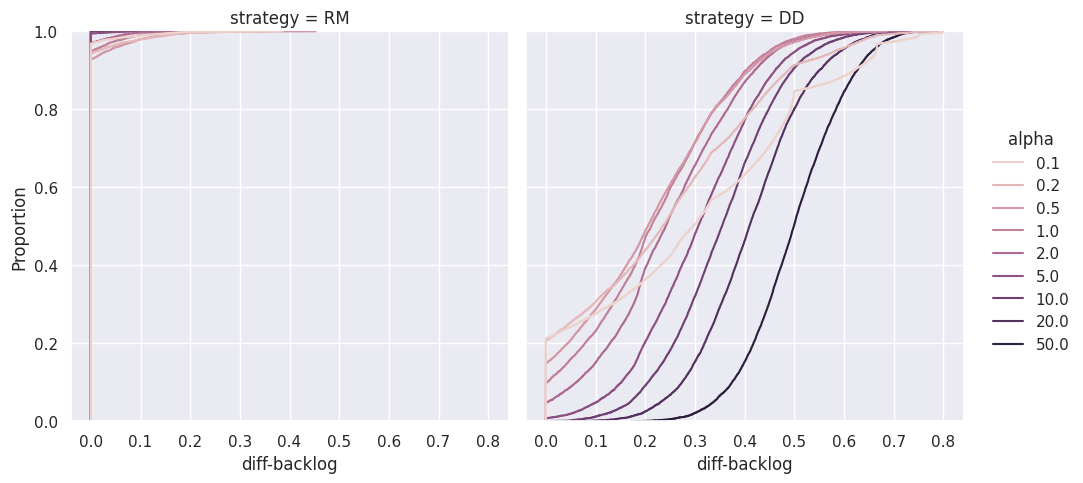

In [23]:
sns.displot(data=df, x='diff-backlog', hue='alpha', hue_norm=mpl.colors.LogNorm(), col='strategy', kind='ecdf')

## Backlog by Parameters for Beta Distribution

letter-value plot showing backlog categorized by distribution parameters (`alpha` always equals `beta`)

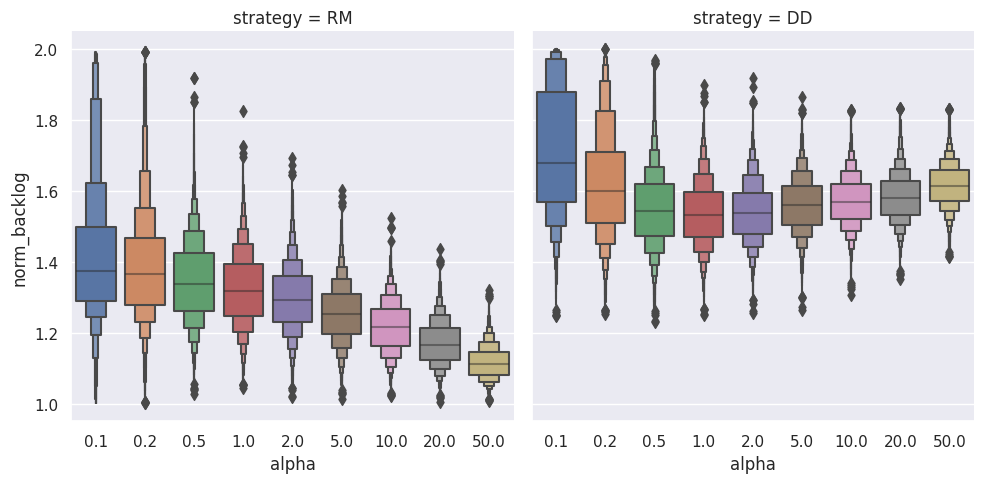

In [24]:
sns.catplot(data=df, x='alpha', y='norm_backlog', col='strategy', kind='boxen')

statistical information about instances, grouped by strategy and parameter for the beta distribution

In [25]:
df.groupby(['strategy', 'alpha'])['norm_backlog'].describe()

count      mean       std       min       25%       50%  \
strategy alpha                                                              
DD       0.1    10000.0  1.710268  0.180996  1.247637  1.568783  1.679261   
         0.2    10000.0  1.619849  0.153885  1.251794  1.507921  1.600631   
         0.5    10000.0  1.547056  0.107208  1.228916  1.471174  1.542437   
         1.0    10000.0  1.535496  0.094197  1.248639  1.468765  1.531421   
         2.0    10000.0  1.539680  0.088038  1.255556  1.479200  1.535888   
         5.0    10000.0  1.559998  0.081353  1.263158  1.502352  1.558981   
         10.0   10000.0  1.570616  0.073921  1.306226  1.520362  1.569538   
         20.0   10000.0  1.581462  0.070312  1.350977  1.532087  1.578715   
         50.0   10000.0  1.614880  0.063359  1.414292  1.570435  1.613596   
RM       0.1    10000.0  1.418864  0.199708  1.000000  1.290323  1.374098   
         0.2    10000.0  1.386716  0.161251  1.002205  1.279181  1.364722   
         0.5    10000.0  1.345786  0.118505  1.027889  1.260694  1.338183   
         1.0    10000.0  1.323129  0.105620  1.044547  1.247649  1.318065   
         2.0    10000.0  1.296586  0.094715  1.017837  1.230879  1.292422   
         5.0    10000.0  1.254185  0.083603  1.012111  1.197122  1.251379   
         10.0   10000.0  1.217274  0.074547  1.021884  1.163312  1.215341   
         20.0   10000.0  1.171032  0.064168  1.004057  1.123732  1.165703   
         50.0   10000.0  1.115862  0.048313  1.007432  1.079715  1.110273   

                     75%       max  
strategy alpha                      
DD       0.1    1.879490  1.999500  
         0.2    1.708562  1.999500  
         0.5    1.618554  1.968317  
         1.0    1.596018  1.897663  
         2.0    1.593996  1.919033  
         5.0    1.612139  1.864975  
         10.0   1.618301  1.826634  
         20.0   1.627371  1.832538  
         50.0   1.659877  1.831199  
RM       0.1    1.497753  1.992032  
         0.2    1.465962  1.992032  
         0.5    1.423955  1.919075  
         1.0    1.393293  1.825911  
         2.0    1.358242  1.691970  
         5.0    1.309460  1.600815  
         10.0   1.267830  1.522018  
         20.0   1.213237  1.435993  
         50.0   1.146142  1.319588

## Cycles

histogram of cycle start for every strategy

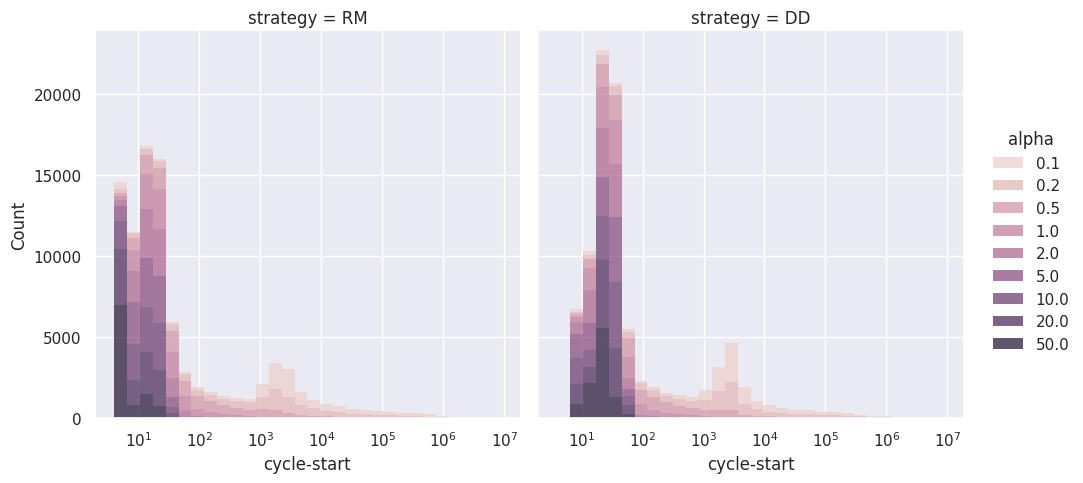

In [26]:
sns.displot(data=df, x='cycle-start', hue='alpha', hue_norm=mpl.colors.LogNorm(), multiple='stack', linewidth=0, col='strategy', log_scale=True, bins=30)

histogram of cycle length for every strategy

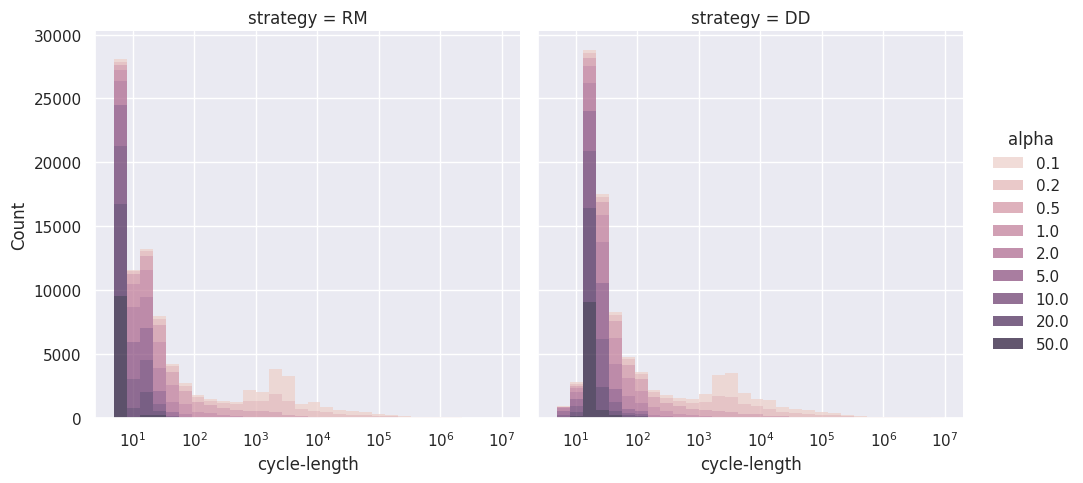

In [27]:
sns.displot(data=df, x='cycle-length', hue='alpha', hue_norm=mpl.colors.LogNorm(), multiple='stack', linewidth=0, col='strategy', log_scale=True, bins=30)

histogram of cycle end for every strategy

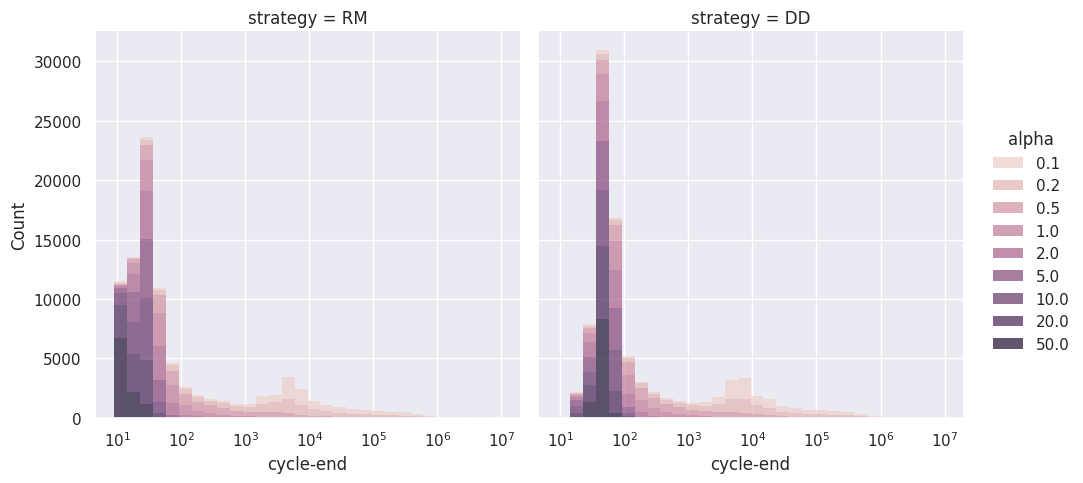

In [28]:
sns.displot(data=df, x='cycle-end', hue='alpha', hue_norm=mpl.colors.LogNorm(), multiple='stack', linewidth=0, col='strategy', log_scale=True, bins=30)

histogram of cycle start for every strategy (proportional)

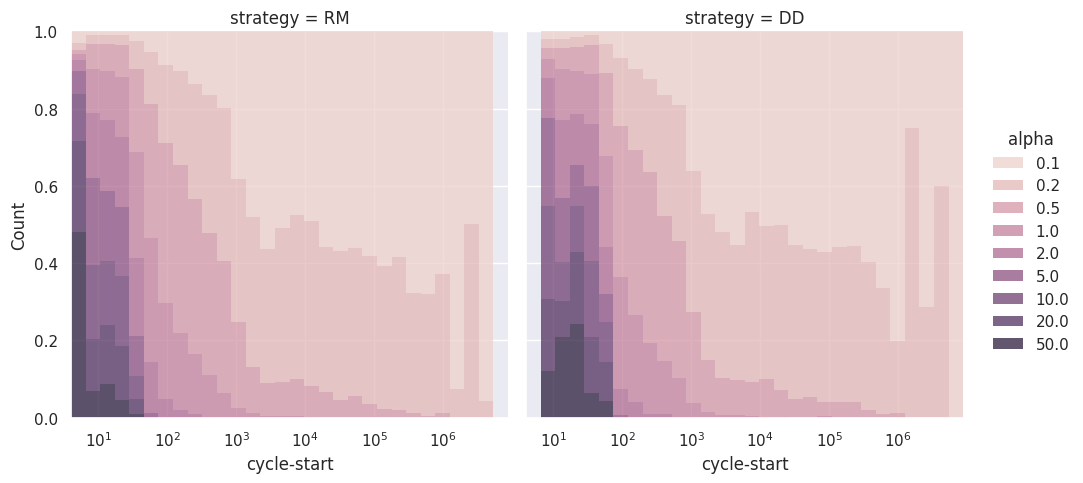

In [29]:
sns.displot(data=df, x='cycle-start', hue='alpha', hue_norm=mpl.colors.LogNorm(), multiple='fill', col='strategy', linewidth=0, log_scale=True, bins=30)

histogram of cycle length for every strategy

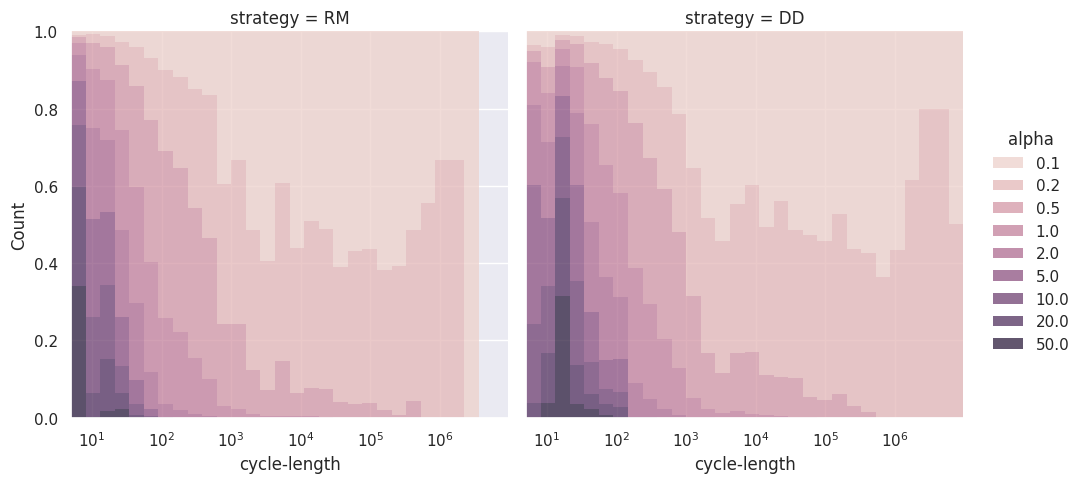

In [30]:
sns.displot(data=df, x='cycle-length', hue='alpha', hue_norm=mpl.colors.LogNorm(), multiple='fill', col='strategy', linewidth=0, log_scale=True, bins=30)

histogram of cycle end for every strategy

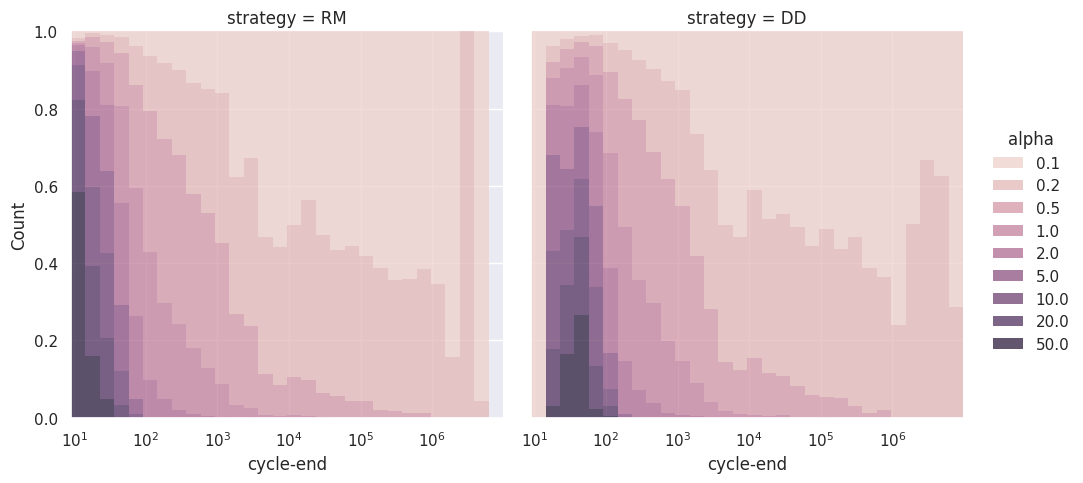

In [31]:
sns.displot(data=df, x='cycle-end', hue='alpha', hue_norm=mpl.colors.LogNorm(), multiple='fill', col='strategy', linewidth=0, log_scale=True, bins=30)

statistical information about cycle start, length and end

In [32]:
df.groupby('alpha')[['cycle-start', 'cycle-length', 'cycle-end']].quantile(.95)

,cycle-start,cycle-length,cycle-end
alpha,,,
0.1,177266.80,86006.85,298780.70
0.2,76675.60,66556.40,170813.70
0.5,3339.00,5693.65,10418.00
1.0,253.00,385.05,657.05
2.0,52.05,90.00,130.00
5.0,43.00,48.00,86.00
10.0,43.00,36.00,77.00
20.0,38.00,32.00,70.00
50.0,31.00,21.00,46.00


In [33]:
df.groupby('alpha')[['cycle-start', 'cycle-length', 'cycle-end']].quantile(.06)

,cycle-start,cycle-length,cycle-end
alpha,,,
0.1,19.0,30.0,54.0
0.2,16.0,21.0,40.0
0.5,11.0,12.0,29.0
1.0,9.0,9.0,23.0
2.0,8.0,8.0,20.0
5.0,7.0,5.0,18.0
10.0,6.0,5.0,15.0
20.0,4.0,5.0,9.0
50.0,4.0,5.0,9.0


letter-value plot showing the round where a cycle starts depending on the distribution parameters `alpha` and `beta`

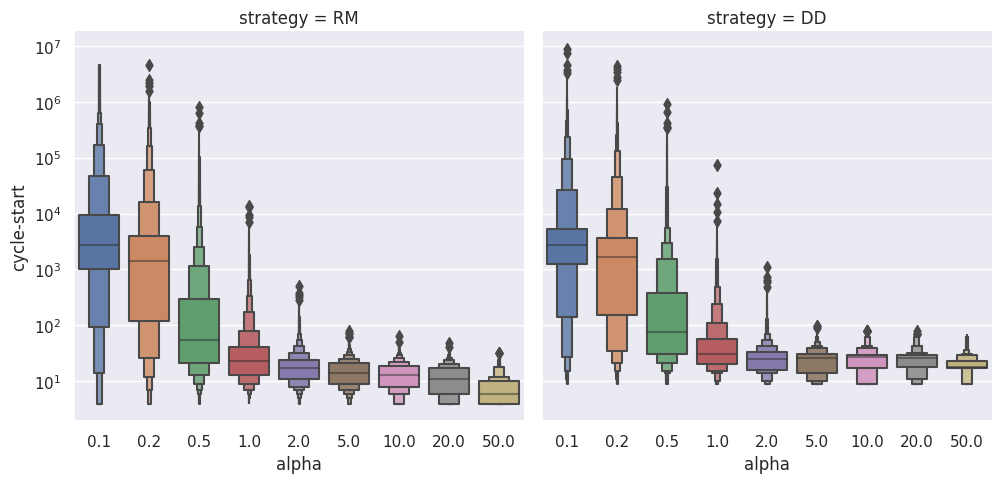

In [34]:
ax = sns.catplot(df, x='alpha', y='cycle-start', col='strategy', kind='boxen')
ax.set(yscale='log')

letter-value plot showing the cycle length depending on the distribution parameters `alpha` and `beta`

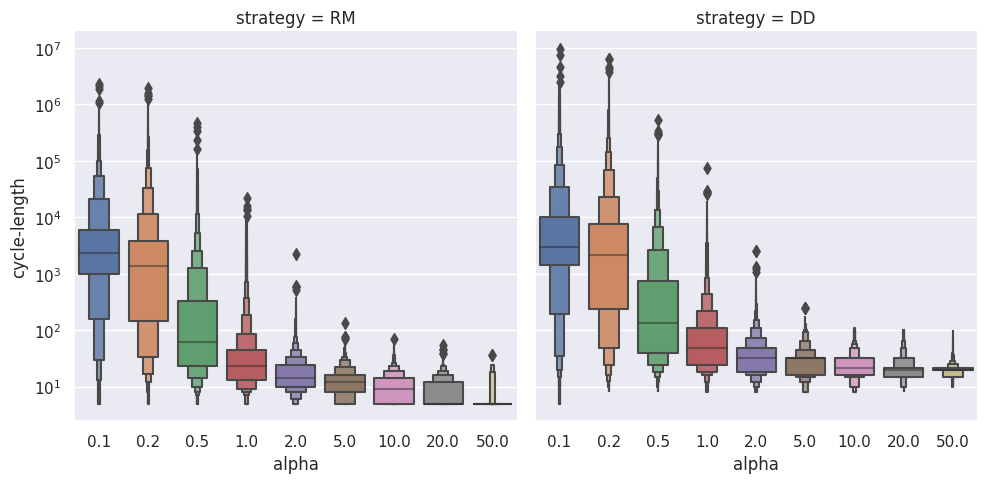

In [35]:
ax = sns.catplot(df, x='alpha', y='cycle-length', col='strategy', kind='boxen')
ax.set(yscale='log')

letter-value plot showing the cycle end depending on the distribution parameters `alpha` and `beta`

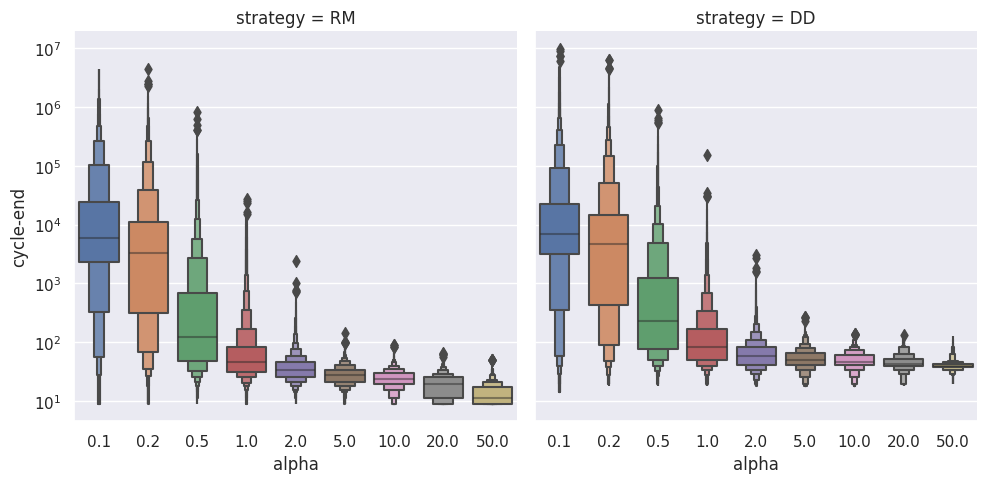

In [36]:
ax = sns.catplot(df, x='alpha', y='cycle-end', col='strategy', kind='boxen')
ax.set(yscale='log')